In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#format stock dataframe 
def get_stock(ticket,p,i):
    data = yf.download(ticket,period=p,interval=i)
    del data["Volume"]
    del data["Close"]
    data["4"] = np.nan
    data["5"] = np.nan
    data["6"] = np.nan
    data["7"] = np.nan
    data = data.set_axis([0,1, 2,3,4,5,6,7], axis=1, inplace=False)
    return data


# Trend Following

In [4]:
#variales 
short = 10
long = 50
#Data 
#0,  1    ,2  , 3  , 4
#open,high,low,close
Data = get_stock("SE","360d","1d")
Data = Data.reset_index(drop= True)
#key Conditions
#Short MA
for i in range(len(Data)):
    try:
        Data.iloc[i, 4] = (Data.iloc[i - short:i + 1, 3].mean())
        
    except IndexError:
        pass
# Long MA
for i in range(len(Data)):
    try:
        Data.iloc[i, 5] = (Data.iloc[i - long:i + 1, 3].mean())
    except IndexError:
        pass
# Position triggers
for i in range(len(Data)):
    try:
        if Data.iloc[i, 4] > Data.iloc[i, 5] and Data.iloc[i - 1, 4] < Data.iloc[i - 1, 5]:
            Data.iloc[i + 1, 6] = 1
        elif Data.iloc[i, 4] < Data.iloc[i, 5] and Data.iloc[i - 1, 4] > Data.iloc[i - 1, 5]:
            Data.iloc[i + 1, 7] = -1
        else:
            continue
    except IndexError:
        pass

[*********************100%***********************]  1 of 1 completed


In [5]:
#getting portfolio Returns
shortP = False
longP = False
gains = []
currentPosition = 0 
positionTime = 0 
for i in range(len(Data)):
    
    #####closing Positions#############
        ####close at end of data######
        if i == len(Data)-1:
            if longP == True :
                longP = False
                gains.append( ((Data.iloc[i,0]-currentPosition)/currentPosition) +1  )
                continue
            #close SHORT
            elif shortP == True:
                shortP = False
                gains.append( ((currentPosition-Data.iloc[i,0])/currentPosition) +1  )
                continue
            
        #close LONG
        if longP == True and Data.iloc[i,7] == -1:
            longP = False
            gains.append( ((Data.iloc[i,0]-currentPosition)/currentPosition) +1  )
            continue
        #close SHORT
        elif shortP == True and Data.iloc[i,6] == 1:
            shortP = False
            gains.append( ((currentPosition-Data.iloc[i,0])/currentPosition) +1  )
            continue
    ####################################
    
    #############POSITION#################
        #GOING LONG
        elif Data.iloc[i,6] == 1 and longP == False:
            longP = True
            try:
                currentPosition = Data.iloc[i+1,0]
            except:
                currentPosition = Data.iloc[i,0]
            positionTime = 0 
            continue
        #GOING SHORT
        elif Data.iloc[i,7] == -1 and shortP == False:
            """
            shortP = True
            try:
                currentPosition = Data.iloc[i+1,0]
            except:
                currentPosition = Data.iloc[i,0]
            positionTime = 0 
            continue
            """
        else:
            continue

In [6]:
portfolio = 100 
overtime = [portfolio]
for i in gains:
    portfolio = portfolio *i
    overtime.append(portfolio)
    
up = [i for i in gains if i >= 1]
down  = [i for i in gains if i <1]

overtime = [x for x in overtime if str(x) != 'nan']

total = len(gains)
positive = (len(up)/total) * np.mean(up)
negative = (len(down)/total) * np.mean(down)
expectancy = positive - negative 
hitRatio = len(up)/ len(gains)*100
netProfit = overtime[-1] - overtime[0]
hold = round(((Data.iloc[len(Data)-1,3]-Data.iloc[0,3])/ Data.iloc[0,3] )*100,2)
print("Expectancy: "+str(round(expectancy,2)))
print("Hit Ratio: " + str(round(hitRatio,2))+"%")
print("Net Profit: "+ str(round(netProfit,2)))
print("Trades: " + str(total))
print("BuyNHold: " + str(hold)+"%")

Expectancy: 0.83
Hit Ratio: 33.33%
Net Profit: 263.26
Trades: 3
BuyNHold: 538.54%


In [7]:
overtime = [int(i) for i in overtime]
n = []
s = overtime[1:]
for i in range(0,len(overtime)):
    try:
        d = overtime[i] - overtime[i-1]
    except:
        pass
    n.append(d)
s = n[1:-1]

In [8]:
Data[3] = np.log(Data[3])

C:\Users\oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\Users\oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  del sys.path[0]


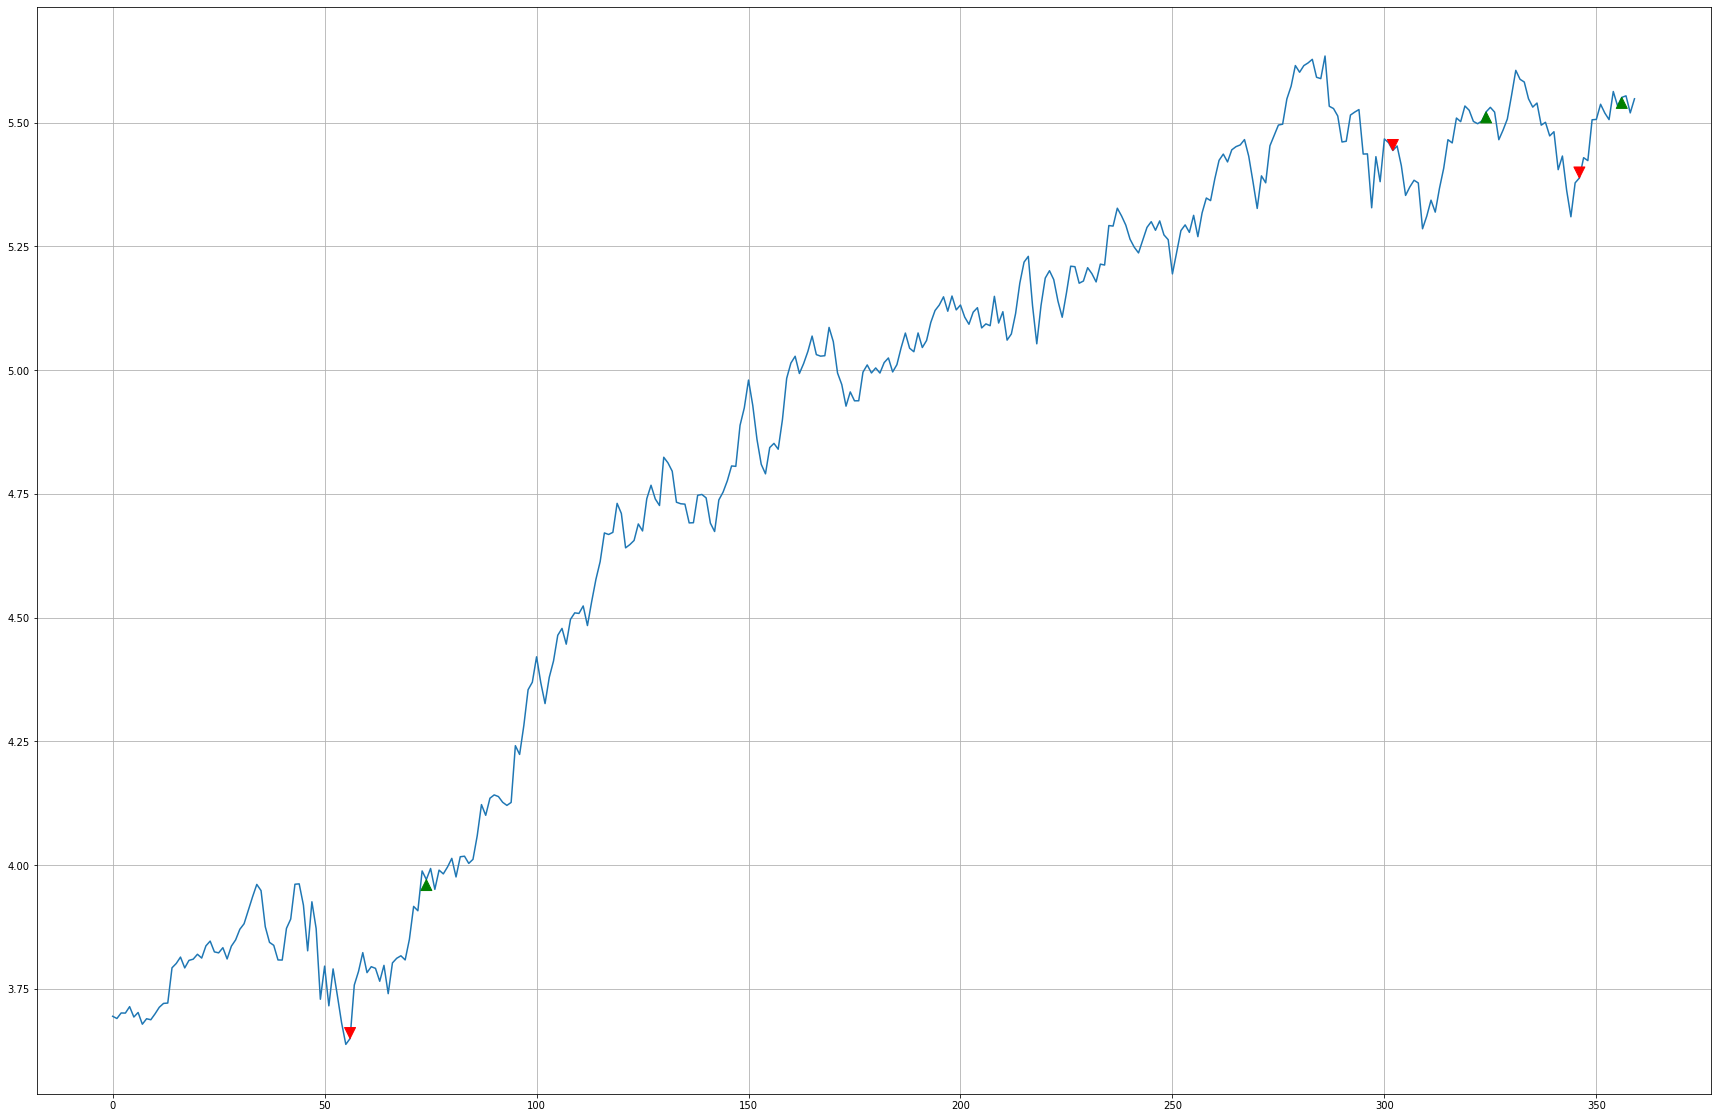

In [9]:
fig, ax = plt.subplots(figsize = (30,20))
ax.grid()
ax.plot(Data.iloc[-10000:,3])

for i in range(len(Data)):

    if Data.iloc[i, 6] == 1:

        x = i
        y = Data.iloc[i, 3]

        ax.annotate(' ', xy = (x, y),
                    arrowprops = dict(width = 9, headlength = 11, headwidth = 11, facecolor = 'green', color = 'green'))

    elif Data.iloc[i, 7] == -1:

        x = i
        y = Data.iloc[i, 3]

        ax.annotate(' ', xy = (x, y),
                    arrowprops = dict(width = 9,
                                      headlength = -11,
                                      headwidth = -11,
                                      facecolor = 'red',
                                      color = 'red'))


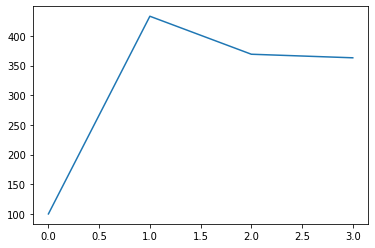

In [10]:
plt.plot(overtime)

In [11]:
overtime

[100, 433, 369, 363]